## LADOT nearest neighbor

7 trips, 2 dates!

* Assemble the data that we need 
   * stop_time grain from schedule side
   * trip grain from vp side
   * use Cal-ITP warehouse tables -> switch to partridge later
* Grab what we need from [data-analyses repo](https://github.com/cal-itp/data-analyses/tree/main/rt_segment_speeds/scripts). Each of these are individual stages that we save out, but let's put it together here in a notebook

### Stage of data processing
1. stop times 
2. vehicle positions

### Stages of getting speeds

3. [nearest neighbor](https://github.com/cal-itp/data-analyses/blob/main/rt_segment_speeds/scripts/nearest_vp_to_stop.py)
4. [interpolate stop arrivals](https://github.com/cal-itp/data-analyses/blob/main/rt_segment_speeds/scripts/interpolate_stop_arrival.py) (this becomes a useful output too, to have a corresponding RT stop times table.)
5. [speeds](https://github.com/cal-itp/data-analyses/blob/main/rt_segment_speeds/scripts/stop_arrivals_to_speed.py) - the output we most obviously need.
6. [averaging speeds by segment](https://github.com/cal-itp/data-analyses/blob/main/rt_segment_speeds/scripts/average_segment_speeds.py)

In [1]:
import folium
import geopandas as gpd
import pandas as pd

import create_table
import utils
import neighbor
import compare_utils

In [2]:
ladot_key = "cc53a0dbf5df90e3009b9cb5d89d80ba"
trips_to_use = [
    "183-07rmbur",
    "30--wPRGN1uEEG",
    "30-_6WXotLOIF7fc",
    "47-3pbila5j7",
]

loopy_trips_to_use = [
    "183-04u26szx9",
    "30-15t6vxs", 
    "30-0SpZx5QGbqM"
]

trip_filter = [[
    ("schedule_gtfs_dataset_key", "==", ladot_key),
    ("trip_id", "in", trips_to_use + loopy_trips_to_use)
]]

gdf = create_table.stop_times_with_vp_table(
    filters = trip_filter
)

/opt/conda/lib/python3.11/site-packages/numpy/lib/function_base.py:2412: RuntimeWarning: invalid value encountered in cardinal_definition_rules (vectorized)
  outputs = ufunc(*inputs)
/opt/conda/lib/python3.11/site-packages/shapely/linear.py:88: RuntimeWarning: invalid value encountered in line_locate_point
  return lib.line_locate_point(line, other)


In [3]:
stops_vp_map = gdf[["stop_sequence", "stop_geometry"]].explore(
    "stop_sequence",
    categorical=True, legend=False,
    tiles = "CartoDB Positron",
    name = "stops"
)

gdf[["trip_instance_key", "vp_geometry"]
].drop_duplicates().set_geometry("vp_geometry").explore(
    "trip_instance_key",
    m=stops_vp_map, categorical=True,
    name="vp", 
)

gdf[["shape_id", "shape_geometry"]
].drop_duplicates().set_geometry("shape_geometry").explore(
    "shape_id",
    m=stops_vp_map, categorical=True,
    name="shape", 
)
folium.LayerControl().add_to(stops_vp_map)
stops_vp_map

In [4]:
gdf2 = neighbor.nearest_neighbor_and_interpolate(gdf)
speed_gdf = neighbor.enforce_monotonicity_calculate_speeds(gdf2)

/opt/conda/lib/python3.11/site-packages/shapely/linear.py:88: RuntimeWarning: invalid value encountered in line_locate_point
  return lib.line_locate_point(line, other)


### "Good Trips" Mapped

min speed: 3.1818066473818982, max speed: inf
total rows: 171
rows with invalid speeds: 26
rows with valid speeds: 145


<AxesSubplot:>

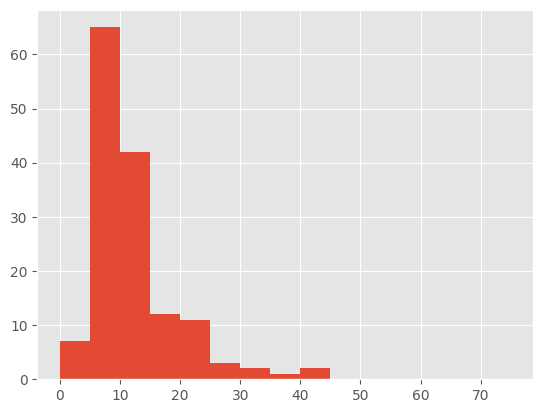

In [5]:
compare_utils.speed_stats(
    speed_gdf[speed_gdf.trip_id.isin(trips_to_use)]
)

In [6]:
compare_utils.speed_map(
    speed_gdf[
        (speed_gdf.trip_id.isin(trips_to_use)) & 
        (speed_gdf.service_date=="2024-10-16")
    ]
)

<AxesSubplot:>

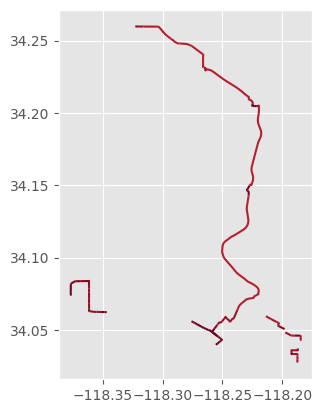

In [7]:
compare_utils.speed_map(
    speed_gdf[
        (speed_gdf.trip_id.isin(trips_to_use)) & 
        (speed_gdf.service_date=="2024-10-16")
    ], 
    static=True
)

In [8]:
compare_utils.speed_map(
    speed_gdf[
        (speed_gdf.trip_id.isin(trips_to_use)) & 
        (speed_gdf.service_date=="2024-11-13")
    ]
)

<AxesSubplot:>

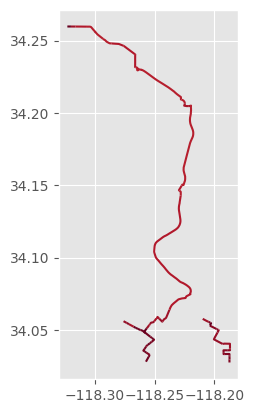

In [9]:
compare_utils.speed_map(
    speed_gdf[
        (speed_gdf.trip_id.isin(trips_to_use)) & 
        (speed_gdf.service_date=="2024-11-13")
    ], 
    static=True
)

### Loopy Trips Mapped

min speed: -12.662418843618914, max speed: inf
total rows: 182
rows with invalid speeds: 10
rows with valid speeds: 172


<AxesSubplot:>

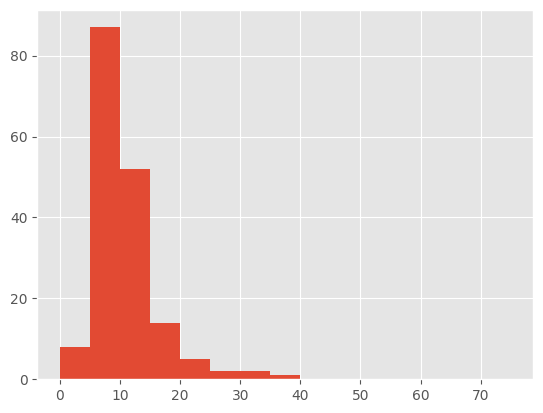

In [10]:
compare_utils.speed_stats(
    speed_gdf[speed_gdf.trip_id.isin(loopy_trips_to_use)]
)

In [11]:
compare_utils.speed_map(
    speed_gdf[
        (speed_gdf.trip_id.isin(loopy_trips_to_use)) & 
        (speed_gdf.service_date=="2024-10-16")
    ]
)

<AxesSubplot:>

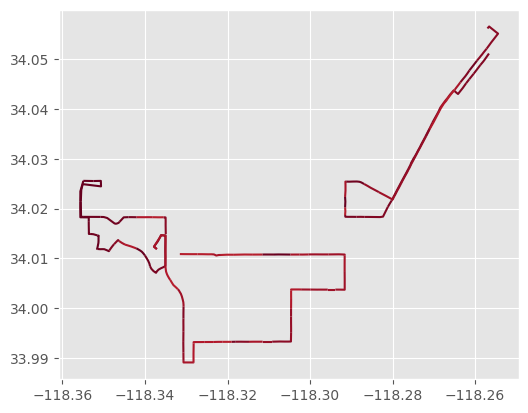

In [12]:
compare_utils.speed_map(
    speed_gdf[
        (speed_gdf.trip_id.isin(loopy_trips_to_use)) & 
        (speed_gdf.service_date=="2024-10-16")
    ], 
    static=True
)

In [13]:
compare_utils.speed_map(
    speed_gdf[
        (speed_gdf.trip_id.isin(loopy_trips_to_use)) & 
        (speed_gdf.service_date=="2024-11-13")
    ], 
)

<AxesSubplot:>

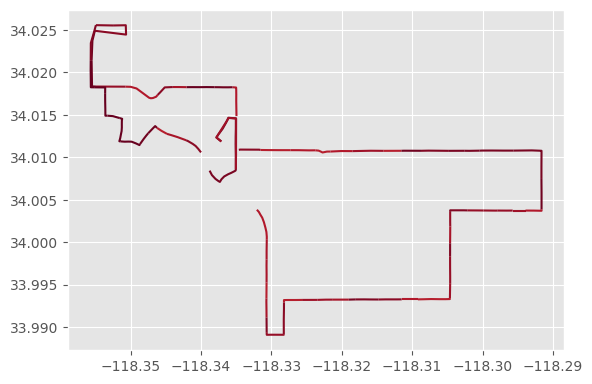

In [14]:
compare_utils.speed_map(
    speed_gdf[
        (speed_gdf.trip_id.isin(loopy_trips_to_use)) & 
        (speed_gdf.service_date=="2024-11-13")
    ], 
    static=True
)